<a href="https://colab.research.google.com/github/FathimaNazarudeen/medical/blob/main/3rd%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1015]:
import pandas as pd 
import numpy as np

In [1016]:
data=pd.read_csv("/content/thirddatasetdata3lung1.csv")

In [1017]:
data['Label'].value_counts()

squamous cell carcinoma    83
large cell                 71
others                     70
adenocarcinoma             23
Name: Label, dtype: int64

In [1018]:
data.columns

Index(['patient', 'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       ...
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength', 'Label'],
      dtype='object', length=1095)

**DATA PREPROCESSING**

In [1019]:
data_real = data.replace(np.inf, np.nan)

In [1020]:
data_real.isnull().sum().sum()

0

In [1021]:
data_df = data_real.dropna(axis=0)

In [1022]:
data_df.isnull().sum().sum()

0

In [1023]:
data_df

,patient,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,Label
0,LUNG1-001,0.725056,0.542669,45.889741,84.562987,94.339811,82.873397,94.339811,95.833188,155537.666700,...,0.000100,0.664985,92655.340510,0.000098,0.007656,0.000435,2.644282e+06,1.349031,90.448629,large cell
1,LUNG1-002,0.879932,0.754730,69.809269,92.495665,114.769334,102.078401,103.247276,124.643492,355183.333300,...,0.000032,0.562477,119165.812700,0.000030,0.007018,0.000320,2.279859e+06,0.939001,110.364475,squamous cell carcinoma
2,LUNG1-003,0.362974,0.249876,17.215103,68.894569,53.366656,32.802439,54.589376,55.821143,8015.000000,...,0.001016,0.767127,21200.197220,0.001008,0.004728,0.010123,1.003403e+05,1.043180,82.613853,large cell
3,LUNG1-003,0.795795,0.755102,34.321101,45.452273,46.173586,51.613952,53.141321,54.589376,38462.666670,...,0.000308,0.550780,6792.975938,0.000268,0.015010,0.002804,8.833958e+04,0.242785,38.399103,large cell
4,LUNG1-003,0.523305,0.329181,24.436223,74.233328,55.317267,84.380092,62.609903,84.970583,33823.000000,...,0.000252,0.798534,140103.795900,0.000250,0.001681,0.002110,3.815156e+06,3.810951,343.304223,large cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,LUNG1-378,0.858946,0.629041,22.559131,35.862723,41.231056,40.199502,44.944410,46.518813,15655.333330,...,0.000583,0.631247,34150.674650,0.000578,0.003251,0.003734,5.346041e+05,1.853703,164.920612,squamous cell carcinoma
243,LUNG1-388,0.661093,0.434015,13.310877,30.669187,26.000000,34.058773,30.265492,34.583233,4879.333333,...,0.001622,0.882267,221264.310900,0.001621,0.000530,0.011488,2.815357e+06,19.749764,1846.205741,adenocarcinoma
244,LUNG1-392,0.816302,0.481091,25.611396,53.236098,60.827625,62.769419,58.240879,67.022384,37239.000000,...,0.000271,0.786842,68418.062950,0.000269,0.003429,0.001911,2.036892e+06,3.771305,157.644501,adenocarcinoma
245,LUNG1-393,0.661763,0.356202,15.229367,42.754858,44.407207,44.721360,34.058773,45.782093,4497.000000,...,0.001824,0.654714,7081.034332,0.001787,0.005967,0.018799,2.306654e+04,0.649522,58.643869,squamous cell carcinoma


In [1024]:
data_X = data_df.drop(['Label'], axis = 1)

In [1025]:
data_X.columns 

Index(['patient', 'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       ...
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength'],
      dtype='object', length=1094)

In [1026]:
data_df.isnull().sum().sum()

0

In [1027]:
data_y = data_df['Label']

**Label Encoding**

In [1028]:
from sklearn.preprocessing import LabelEncoder 

In [1029]:
le = LabelEncoder()

In [1030]:
data_y_trans = le.fit_transform(data_y)
le_fid = LabelEncoder()

In [1031]:
le_fid.fit(data_X['patient'])
data_X['patient'] = le_fid.fit_transform(data_X['patient'])

**Train Test Split**

In [1032]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y, train_size = 0.7)

**Standardization**

In [1033]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

**Feature Selection**

In [1034]:
from sklearn.ensemble import ExtraTreesClassifier

In [1035]:
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, 
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=20,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

model.fit(data_X, data_y_trans)

ExtraTreesClassifier(n_estimators=20, random_state=42)

In [1036]:
model.feature_importances_

array([0.00381047, 0.        , 0.0016221 , ..., 0.00044798, 0.00169619,
       0.00054345])

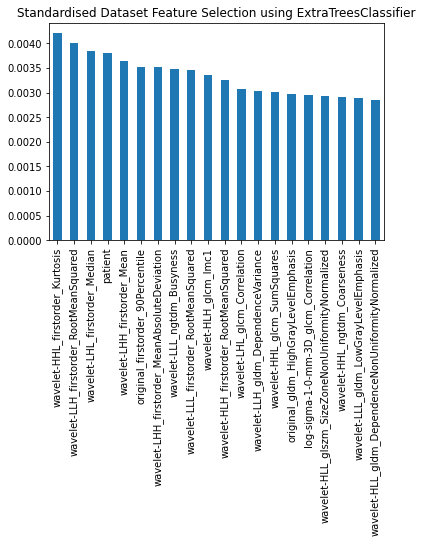

In [1037]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [1038]:
feature_importance_std.nlargest(20)

wavelet-HHL_firstorder_Kurtosis                       0.004208
wavelet-LLH_firstorder_RootMeanSquared                0.004006
wavelet-LHL_firstorder_Median                         0.003846
patient                                               0.003810
wavelet-LHH_firstorder_Mean                           0.003647
original_firstorder_90Percentile                      0.003512
wavelet-LHH_firstorder_MeanAbsoluteDeviation          0.003510
wavelet-LLL_ngtdm_Busyness                            0.003479
wavelet-LLL_firstorder_RootMeanSquared                0.003464
wavelet-HLH_glcm_Imc1                                 0.003359
wavelet-HLH_firstorder_RootMeanSquared                0.003257
wavelet-LHL_glcm_Correlation                          0.003069
wavelet-LLH_gldm_DependenceVariance                   0.003034
wavelet-HHL_glcm_SumSquares                           0.003014
original_gldm_HighGrayLevelEmphasis                   0.002976
log-sigma-1-0-mm-3D_glcm_Correlation                  0

In [1039]:
data_new_20features_X = data_X[['wavelet-HHL_firstorder_Kurtosis','wavelet-LLH_firstorder_RootMeanSquared','wavelet-LHL_firstorder_Median','patient','wavelet-LHH_firstorder_Mean','original_firstorder_90Percentile','wavelet-LHH_firstorder_MeanAbsoluteDeviation','wavelet-LLL_ngtdm_Busyness','wavelet-LLL_firstorder_RootMeanSquared','wavelet-HLH_glcm_Imc1','wavelet-HLH_firstorder_RootMeanSquared','wavelet-LHL_glcm_Correlation','wavelet-LLH_gldm_DependenceVariance','wavelet-HHL_glcm_SumSquares','original_gldm_HighGrayLevelEmphasis','log-sigma-1-0-mm-3D_glcm_Correlation','wavelet-HLL_glszm_SizeZoneNonUniformityNormalized','wavelet-HHL_ngtdm_Coarseness','wavelet-LLL_gldm_LowGrayLevelEmphasis','wavelet-HLL_gldm_DependenceNonUniformityNormalized']]

In [1040]:
data_new_20features_X

,wavelet-HHL_firstorder_Kurtosis,wavelet-LLH_firstorder_RootMeanSquared,wavelet-LHL_firstorder_Median,patient,wavelet-LHH_firstorder_Mean,original_firstorder_90Percentile,wavelet-LHH_firstorder_MeanAbsoluteDeviation,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_firstorder_RootMeanSquared,wavelet-HLH_glcm_Imc1,wavelet-HLH_firstorder_RootMeanSquared,wavelet-LHL_glcm_Correlation,wavelet-LLH_gldm_DependenceVariance,wavelet-HHL_glcm_SumSquares,original_gldm_HighGrayLevelEmphasis,log-sigma-1-0-mm-3D_glcm_Correlation,wavelet-HLL_glszm_SizeZoneNonUniformityNormalized,wavelet-HHL_ngtdm_Coarseness,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-HLL_gldm_DependenceNonUniformityNormalized
0,7.915006,982.103315,-7.762204,0,1.201824,58.312960,29.834827,0.007656,962.191510,-0.052848,1000.876442,0.194501,3.219333,137.279111,1.755190e+06,0.150259,0.632874,0.000387,0.000100,0.329466
1,13.753936,999.192937,-2.230539,1,0.457392,92.769604,18.933420,0.007018,1065.510430,-0.056076,1000.601090,0.201207,5.676894,120.936598,2.216965e+06,0.130673,0.582702,0.000177,0.000032,0.249234
2,15.248906,994.590728,-8.937909,2,-0.537058,113.819070,16.504980,0.004728,1113.909562,-0.138583,1000.014498,0.268111,1.670095,177.912700,1.600159e+05,0.149277,0.620988,0.006218,0.001016,0.415342
3,65.354358,987.598116,-0.298334,2,0.121915,82.692553,10.108349,0.015010,1114.941316,-0.131292,1001.455985,0.102110,4.215735,51.375705,1.116881e+05,0.311002,0.521992,0.001324,0.000308,0.263028
4,6.431950,989.980445,-8.209150,2,0.433143,101.827495,30.522930,0.001681,956.541790,-0.106515,1001.888173,0.278142,1.172241,442.575898,2.278356e+06,0.112057,0.777320,0.001720,0.000252,0.562668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,8.654580,979.593600,-7.512969,134,1.189369,59.427517,20.885370,0.003251,1018.490380,-0.115319,1000.703621,0.226745,7.583906,161.826154,5.766776e+05,0.403385,0.657582,0.004226,0.000583,0.300817
243,7.764825,1000.063615,-1.010575,135,-1.041321,113.297597,28.298195,0.000530,1029.886087,-0.322611,1002.970828,0.302605,0.709802,199.496371,3.399511e+06,0.239883,0.727027,0.011188,0.001622,0.459895
244,5.366552,979.980571,-29.367862,136,1.638895,45.757856,29.495995,0.003429,816.615775,-0.063097,1001.712780,0.251922,1.730116,203.698170,1.435388e+06,0.143729,0.656154,0.001419,0.000271,0.420090
245,11.545969,999.508458,-6.440864,137,0.561272,59.946450,15.279272,0.005967,1054.404700,-0.084990,999.158723,0.219259,3.006635,27.036660,5.502566e+04,0.267097,0.507872,0.010292,0.001824,0.281159


**Train Test Split 20 Feature Dataset**

In [1041]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.85,random_state=42)

**Standardization of the 20 Feature Dataset**

In [1042]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

**CLASSIFICATION**

**Random forest**

In [1043]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=31, n_estimators=100, max_depth=None)
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier(random_state=31)

In [1044]:
rf_y_pred = rf.predict(X_test_std_20)

In [1045]:
from sklearn.metrics import accuracy_score 

In [1046]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 52.63157894736842


In [1047]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [1048]:
print("Classification Report for Random Forest: \n", classification_report(y_test_20,rf_y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.38      0.75      0.50         8
           2       0.70      0.50      0.58        14
           3       0.64      0.50      0.56        14

    accuracy                           0.53        38
   macro avg       0.43      0.44      0.41        38
weighted avg       0.57      0.53      0.53        38



In [1049]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[0 1 0 1]
 [0 6 2 0]
 [0 4 7 3]
 [1 5 1 7]]


cross validation

In [1050]:
from sklearn.model_selection import KFold
kfold_validation=KFold(5)
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf,data_new_20features_X, data_y_trans,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.24       0.34       0.42857143 0.42857143 0.24489796]
0.33640816326530615


RoC curve Function

In [1051]:
def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 3
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['adeno','squamous','other']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()

In [1052]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


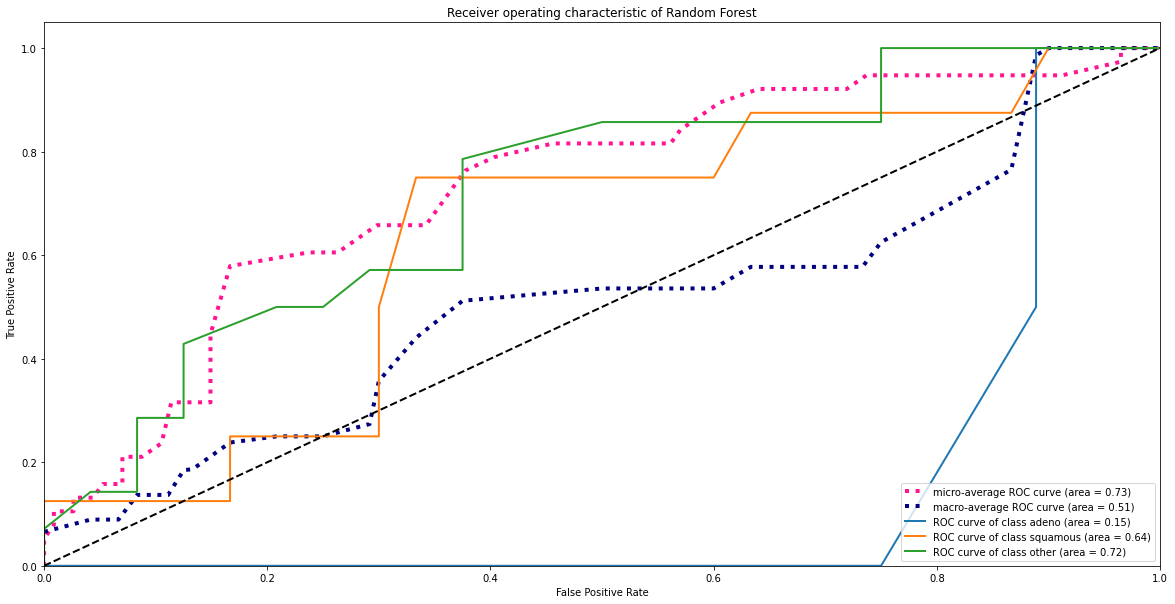

In [1053]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

**Decision tree**

In [1054]:
from sklearn.tree import DecisionTreeClassifier
ml_dec = DecisionTreeClassifier()

In [1055]:
ml_dec.fit(X_train_std_20, y_train_20)

DecisionTreeClassifier()

In [1056]:
res_dec=ml_dec.predict(X_test_std_20)

In [1057]:
accuracy_1=accuracy_score(y_test_20,res_dec)
print("Decision tree :",accuracy_1*100)

Decision tree : 39.473684210526315


**XG Boost**

In [1058]:
from sklearn.ensemble import GradientBoostingClassifier

In [1059]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier()

In [1060]:
res_xg=gradient_boost.predict(X_test_std_20)

In [1061]:
acc_score_xg = accuracy_score(y_test_20, res_xg)
print("Accuracy Score for GradientBoosting: \n", acc_score_xg*100)

Accuracy Score for GradientBoosting: 
 39.473684210526315


**Naive Bayes**

In [1062]:
from sklearn.naive_bayes import GaussianNB 

In [1063]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [1064]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 39.473684210526315
